In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import glob
import numpy
import random

from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchsummary import summary

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

In [2]:
dataset = 'C:/Users/fixer/Music/KPT Projek/Assignment 3/ThumbsData/'
train_directory = os.path.join(dataset, 'train')
classes = os.listdir(train_directory)
print(classes)

['down', 'up']


In [3]:
# Applying Transforms to the Data
import torchvision
import torchvision.transforms as transforms

image_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

In [4]:
model = torch.load('C:/Users/fixer/Music/KPT Projek/Assignment 3/ThumbsData/thumbest.pt', map_location=torch.device('cpu'))

In [5]:
def classify(model, image_transform, image_path, classes):
    model = model.eval()
    image = Image.open(image_path)
    image = image_transform(image).float()
    image = image.unsqueeze(0)
    
    output = model(image)
    _,predicted = torch.max(output.data, 1)
    
    print(classes[predicted.item()])

10


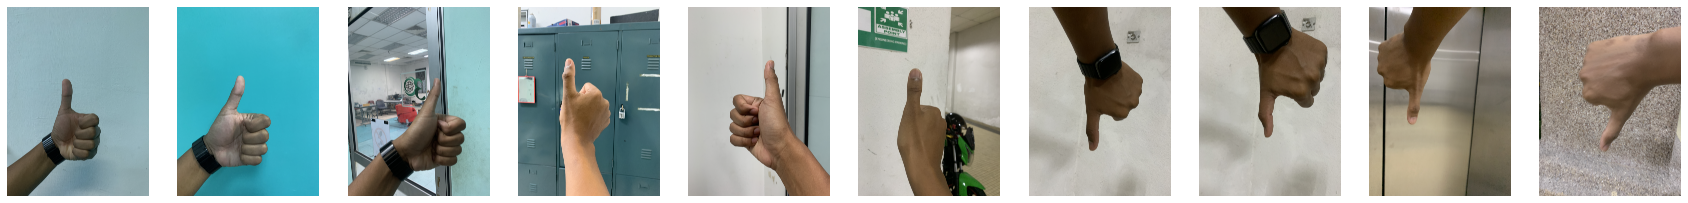

In [6]:
imagefiles = glob.glob("C:/Users/fixer/Music/KPT Projek/Assignment 3/ThumbsData/evaluation/*")
imagefiles.sort()
images = []
for filename in imagefiles:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
num_images = len(images)
print(num_images)

plt.figure(figsize=[30,10]) 
num_cols = num_images
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1) 
    plt.axis('off')
    plt.imshow(images[i])

In [7]:
imagefiles = glob.glob("C:/Users/fixer/Music/KPT Projek/Assignment 2/evaluation/*")
for image in imagefiles:
    fruit = classify(model, image_transforms, image, classes)

down
up
up
up
up
down
down
down
down
down
down
